**Import the necessary packages**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

**Load data**

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Data Analysis**

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

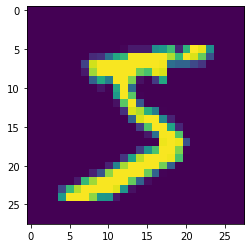

In [9]:
plt.imshow(X_train[0])

**Data Pre-Processing**

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [11]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Create model**

In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])



**Train the model**

In [15]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2002 - accuracy: 0.9541 - val_loss: 0.0949 - val_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0801 - val_accuracy: 0.9770
Epoch 3/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.1021 - val_accuracy: 0.9690
Epoch 4/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0350 - accuracy: 0.9883 - val_loss: 0.1026 - val_accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0975 - val_accuracy: 0.9773


**Test the model**

In [16]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09754560887813568, 0.9772999882698059]


In [17]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 83ms/step
[[2.4458819e-09 1.7486335e-16 2.7870368e-09 1.9710885e-08 6.5821589e-14
  2.7557270e-10 4.9979123e-17 9.9996293e-01 3.6937709e-05 1.1739241e-07]
 [3.0228959e-09 1.2788596e-09 9.9999964e-01 7.1349774e-08 3.5676665e-14
  1.2631370e-19 2.1033436e-07 3.1644628e-18 2.7392313e-10 4.2165869e-14]
 [6.0739160e-09 9.9989283e-01 1.0784371e-05 1.3078509e-10 3.4476861e-07
  6.6886012e-09 1.1513035e-09 3.6142617e-10 9.6052885e-05 1.2744891e-08]
 [9.9999976e-01 6.4786575e-14 7.5012869e-13 3.3594858e-15 4.3737233e-18
  6.5013692e-15 1.4805127e-07 4.6025044e-13 1.9477968e-10 1.6663004e-07]]


In [18]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Save the model**

In [19]:
model.save("model.h5")

**Test the saved model**

In [20]:
model=load_model("model.h5")

In [21]:
img = Image.open("/content/Sample-png.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 58ms/step
0    5
Name: Label, dtype: int64
